In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from datetime import datetime


## Loading and preparing the data

In [106]:
# stop_events = pd.read_csv("../data_files/B/once/75days/stop_events_with_geo_train_test_averages.feather")

results = pd.read_csv("post_noise_width_time_threshold_test.csv")
results['area'] = (results['width'] * 2 + 1) * ((results['time'] - 15)/15)
results.sort_values('pass_fraction', ascending=False).head(25)



,width,time,threshold,threshold_pass_fraction,mean_weights,pass_count,pass_fraction,area
543,6,180,60,0.840630,257.493603,2938868,0.384554,143.0
465,5,180,60,0.821117,241.209186,2938692,0.384531,121.0
542,6,180,50,0.869207,250.856480,2938146,0.384459,143.0
544,6,180,80,0.778824,272.343577,2937659,0.384396,143.0
464,5,180,50,0.854461,233.966049,2937590,0.384387,121.0
466,5,180,80,0.755461,256.066489,2937366,0.384357,121.0
387,4,180,60,0.774619,209.614025,2937025,0.384313,99.0
386,4,180,50,0.814847,201.998204,2936576,0.384254,99.0
530,6,150,60,0.807818,219.936598,2936523,0.384247,117.0
529,6,150,50,0.846039,212.509233,2936383,0.384229,117.0


In [154]:
best_threshold = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['width','time'])

In [155]:
best_threshold = best_threshold.reset_index()
best_threshold = best_threshold[['width', 'time', 'pass_fraction']]
best_threshold=best_threshold.pivot('width', 'time')

In [161]:
X=[x[1] for x in best_threshold.columns.values]
Y=best_threshold.index.values.astype(float) * 2 + 1
Z=best_threshold.values * 100

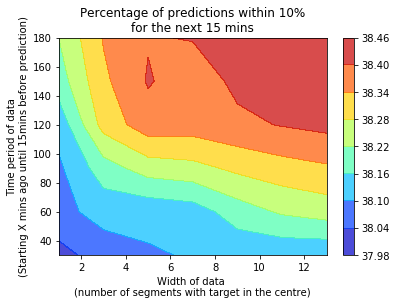

In [162]:

Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.xlabel("Width of data \n(number of segments with target in the centre)")
plt.ylabel("Time period of data\n(Starting X mins ago until 15mins before prediction)")
plt.title("Percentage of predictions within 10%\nfor the next 15 mins")
plt.colorbar()
plt.show()

In [77]:
best_width = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['time', 'threshold'])

In [78]:
best_width = best_width.reset_index()
best_width = best_width[['time', 'threshold', 'pass_fraction']]
best_width = best_width.pivot('time', 'threshold')

In [79]:
X=[x[1] for x in best_width.columns.values]
Y=best_width.index.values.astype(float)
Z=np.clip(best_width.values * 100, 37.5, 40)

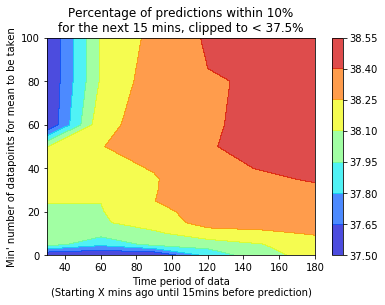

In [80]:
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Min' number of datapoints for mean to be taken")
plt.xlabel("Time period of data\n(Starting X mins ago until 15mins before prediction)")
plt.title("Percentage of predictions within 10%\nfor the next 15 mins, clipped to < 37.5%")
plt.colorbar()
plt.show()

In [81]:
best_time = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['width', 'threshold'])

In [82]:
best_time = best_time.reset_index()
best_time = best_time[['width', 'threshold', 'pass_fraction']]
best_time = best_time.pivot('width', 'threshold')

In [84]:
X=[x[1] for x in best_time.columns.values]
Y=best_time.index.values.astype(float) * 2 + 1
Z=np.clip(best_time.values * 100, 37.5, 40)
# Z=best_time.values

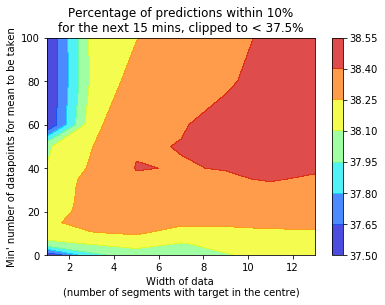

In [86]:
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Min' number of datapoints for mean to be taken")
plt.xlabel("Width of data \n(number of segments with target in the centre)")
plt.title("Percentage of predictions within 10%\nfor the next 15 mins, clipped to < 37.5%")
plt.colorbar()
plt.show()

In [88]:
best_areas = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['area', 'threshold'])

In [89]:
best_areas = best_areas.reset_index()
best_areas = best_areas[['area', 'threshold', 'pass_fraction']]
best_areas = best_areas.pivot('area', 'threshold')

In [96]:
X=[x[1] for x in best_areas.columns.values]
Y=best_areas.index.values.astype(float)
Z=np.clip(best_areas.values * 100, 37.5, 40)

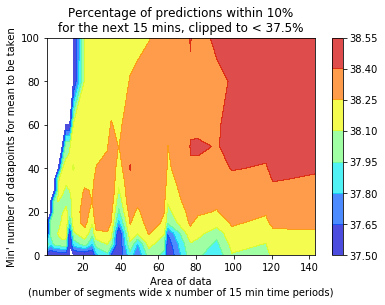

In [97]:
Xi,Yi = np.meshgrid(X, Y)
plt.contourf(Yi, Xi, Z, alpha=0.7, cmap=plt.cm.jet)
plt.ylabel("Min' number of datapoints for mean to be taken")
plt.xlabel("Area of data\n(number of segments wide x number of 15 min time periods)")
plt.title("Percentage of predictions within 10%\nfor the next 15 mins, clipped to < 37.5%")
plt.colorbar()
plt.show()

In [163]:
best_thresholds_1d = results.sort_values('pass_fraction', ascending=False).drop_duplicates(['width', 'time'])

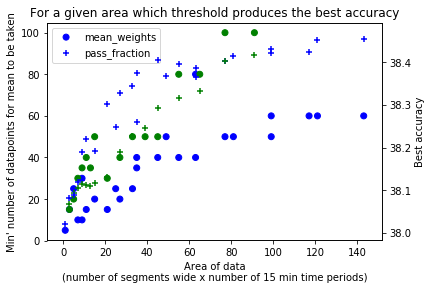

In [170]:
shape = ((best_thresholds_1d['width'] * 2) + 1) / ((best_thresholds_1d['time'] - 15)/15)

colors = ['green' if shape > 1.5 else "blue" for shape in shape.values]

plt.scatter(best_thresholds_1d['area'], best_thresholds_1d['threshold'], c=colors)
plt.title("For a given area which threshold produces the best accuracy")
plt.xlabel("Area of data\n(number of segments wide x number of 15 min time periods)")
plt.ylabel("Min' number of datapoints for mean to be taken")

ax1 = plt.gca()

ax2 = plt.gca().twinx()

lns2 = ax2.scatter(best_thresholds_1d['area'], best_thresholds_1d['pass_fraction'] * 100, c=colors, marker="+")
ax2.set_ylabel("Best accuracy")

# Solution for having two legends (from https://medium.com/@samchaaa/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a)
leg = [lns1, lns2]
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=2)

plt.show()

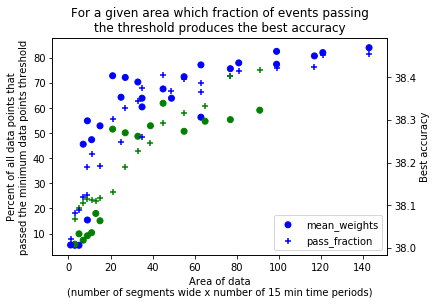

In [169]:
plt.scatter(best_thresholds_1d['area'], best_thresholds_1d['threshold_pass_fraction']*100, c=colors)
plt.title("For a given area which fraction of events passing\nthe threshold produces the best accuracy")
plt.xlabel("Area of data\n(number of segments wide x number of 15 min time periods)")
plt.ylabel("Percent of all data points that\npassed the minimum data points threshold")

ax1 = plt.gca()

ax2 = plt.gca().twinx()

lns2 = ax2.scatter(best_thresholds_1d['area'], best_thresholds_1d['pass_fraction'] * 100, c=colors, marker="+")
ax2.set_ylabel("Best accuracy")

# Solution for having two legends (from https://medium.com/@samchaaa/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a)
leg = [lns1, lns2]
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)


plt.show()

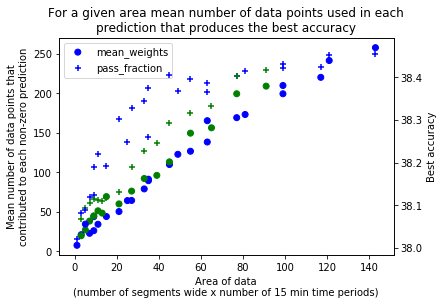

In [171]:
lns1 = plt.scatter(best_thresholds_1d['area'], best_thresholds_1d['mean_weights'], c=colors)
plt.title("For a given area mean number of data points used in each\nprediction that produces the best accuracy")
plt.xlabel("Area of data\n(number of segments wide x number of 15 min time periods)")
plt.ylabel("Mean number of data points that\ncontributed to each non-zero prediction")

ax1 = plt.gca()

ax2 = plt.gca().twinx()

lns2 = ax2.scatter(best_thresholds_1d['area'], best_thresholds_1d['pass_fraction'] * 100, c=colors, marker="+")
ax2.set_ylabel("Best accuracy")

# Solution for having two legends (from https://medium.com/@samchaaa/how-to-plot-two-different-scales-on-one-plot-in-matplotlib-with-legend-46554ba5915a)
leg = [lns1, lns2]
labs = [l.get_label() for l in leg]
ax1.legend(leg, labs, loc=0)

plt.show()